<a href="https://colab.research.google.com/github/jabhiro/Pemograman-Dasar/blob/main/Latihan_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
Rajab_Kurnia = pd.read_csv('/content/orders.csv')

In [7]:
import pandas as pd

Rajab_Kurnia["order_date"] = pd.to_datetime(Rajab_Kurnia["order_date"])
Rajab_Kurnia["delivery_date"] = pd.to_datetime(Rajab_Kurnia["delivery_date"])

In [8]:
Rajab_Kurnia.describe()

,order_id,customer_id,payment,order_date,delivery_date
count,1000.000000,1000.000000,1000.000000,1000,1000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00
std,288.819436,277.115502,14451.609047,NaN,NaN


In [9]:
Rajab_Kurnia["payment"].mean()

np.float64(33972.936)

In [10]:
Rajab_Kurnia["payment"].mode()
Rajab_Kurnia["customer_id"].mode()

,customer_id
0,571


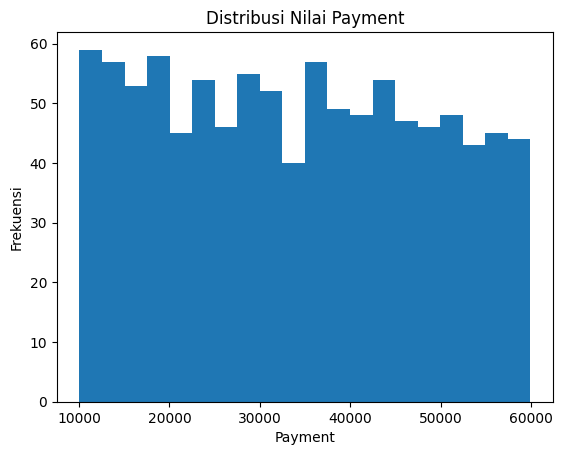

In [11]:
import matplotlib.pyplot as plt

plt.hist(Rajab_Kurnia["payment"], bins=20)
plt.title("Distribusi Nilai Payment")
plt.xlabel("Payment")
plt.ylabel("Frekuensi")
plt.show()

In [12]:
Rajab_Kurnia["delivery_days"] = (Rajab_Kurnia["delivery_date"] - Rajab_Kurnia["order_date"]).dt.days

In [13]:
Rajab_Kurnia[["payment","delivery_days"]].corr()

,payment,delivery_days
payment,1.000000,-0.042244
delivery_days,-0.042244,1.000000


In [14]:
Rajab_Kurnia[["payment","delivery_days"]].cov()

,payment,delivery_days
payment,2.088490e+08,-4705.265273
delivery_days,-4.705265e+03,59.401317


In [15]:
Rajab_Kurnia.groupby("customer_id")["payment"].mean()

,payment
customer_id,
1,23463.0
7,48935.0
10,45626.0
11,41952.0
12,39451.0
...,...
994,58159.0
995,58829.0
996,26014.0


In [16]:
Rajab_Kurnia.groupby("customer_id").agg({
    "payment": ["mean", "max", "min", "count"],
    "delivery_days": "mean"
})

payment                     delivery_days
                mean    max    min count          mean
customer_id                                           
1            23463.0  35593  10246     3         13.00
7            48935.0  48935  48935     1          2.00
10           45626.0  45626  45626     1         20.00
11           41952.0  41952  41952     1          8.00
12           39451.0  39451  39451     1         12.00
...              ...    ...    ...   ...           ...
994          58159.0  58159  58159     1         22.00
995          58829.0  58829  58829     1         15.00
996          26014.0  29939  22089     2          9.50
998          25318.5  45215  15870     4         12.75
1000         35622.0  35622  35622     1          2.00

[617 rows x 5 columns]